In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [2]:

X_train, X_val, y_val = load_data()

In [3]:

print("The first 5 elements of X_train are:\n", X_train[:5])

The first 5 elements of X_train are:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]


In [4]:

print("The first 5 elements of X_val are\n", X_val[:5]) 

The first 5 elements of X_val are
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]


In [5]:

print("The first 5 elements of y_val are\n", y_val[:5]) 

The first 5 elements of y_val are
 [0 0 0 0 0]


In [6]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of X_val is:', X_val.shape)
print ('The shape of y_val is: ', y_val.shape)

The shape of X_train is: (307, 2)
The shape of X_val is: (307, 2)
The shape of y_val is:  (307,)


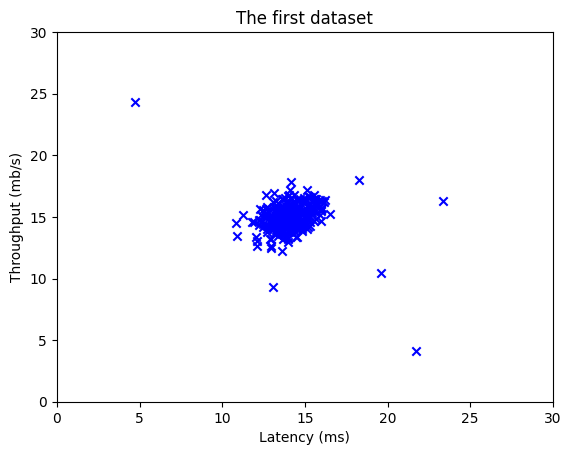

In [7]:

plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b') 


plt.title("The first dataset")

plt.ylabel('Throughput (mb/s)')

plt.xlabel('Latency (ms)')

plt.axis([0, 30, 0, 30])
plt.show()

In [8]:


def estimate_gaussian(X): 
   

    m, n = X.shape
    
    
    mu = 1 / m * np.sum(X, axis = 0)
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)
   
        
    return mu, var

In [12]:

mu, var = estimate_gaussian(X_train)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)
    



Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]


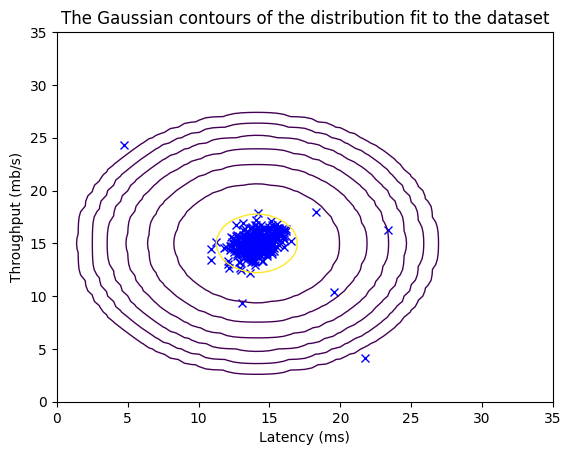

In [13]:

p = multivariate_gaussian(X_train, mu, var)


visualize_fit(X_train, mu, var)

In [14]:


def select_threshold(y_val, p_val): 
    

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        
        predictions = (p_val < epsilon)
        
        fp = sum((predictions == 1) & (y_val == 0))
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        
        
        
        
        
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [16]:
p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)
    




Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


C:\Users\sutar\AppData\Local\Temp\ipykernel_28556\2786535183.py:33: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


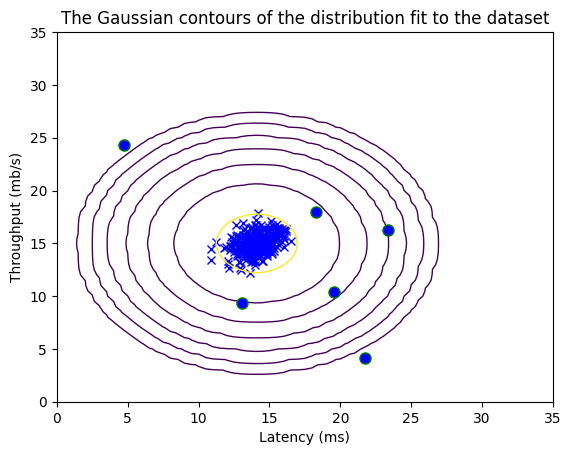

In [22]:

outliers = p < epsilon


visualize_fit(X_train, mu, var)


plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'go',
         markersize= 8,markerfacecolor='blue', markeredgewidth=1)

In [18]:

X_train_high, X_val_high, y_val_high = load_data_multi()

In [19]:
print ('The shape of X_train_high is:', X_train_high.shape)
print ('The shape of X_val_high is:', X_val_high.shape)
print ('The shape of y_val_high is: ', y_val_high.shape)

The shape of X_train_high is: (1000, 11)
The shape of X_val_high is: (100, 11)
The shape of y_val_high is:  (100,)


In [20]:



mu_high, var_high = estimate_gaussian(X_train_high)


p_high = multivariate_gaussian(X_train_high, mu_high, var_high)


p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)


epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

print('Best possible epsilon found using cross-validation: %e'% epsilon_high)
print('Best F1 on Cross Validation Set:  %f'% F1_high)
print('# Anomalies found: %d'% sum(p_high < epsilon_high))

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Anomalies found: 117


C:\Users\sutar\AppData\Local\Temp\ipykernel_28556\2786535183.py:33: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
